In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import os
pd.set_option('display.max_rows', None)


#path = os.path.join('C:' + os.sep, 'ASG', 'Desktop', 'DataViz', 'glassdoor_data.csv')
glassdoor_data = pd.read_csv(r"C:\Users\ASG\Desktop\DataViz\glassdoor_data.csv")

In [6]:
glassdoor_data.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

In [1]:
# this chart will show 
types= glassdoor_data['Industry']
industry_type = pd.DataFrame(types)
industry_type.head()

NameError: name 'glassdoor_data' is not defined

In [8]:
# finding duplicates 
#industry_type.duplicated(keep=True)

In [2]:
glassdoor_data.loc[glassdoor_data['Industry'] == 'IT Services']

NameError: name 'glassdoor_data' is not defined

In [3]:
glassdoor_data.loc[glassdoor_data['Industry'] == 'Staffing & Outsourcing']

NameError: name 'glassdoor_data' is not defined

In [11]:
job_sectors = glassdoor_data['Industry'].value_counts()
job_sectors = job_sectors[:13]
job_sectors

-1                                         546
IT Services                                472
Staffing & Outsourcing                     313
Biotech & Pharmaceuticals                  293
Computer Hardware & Software               264
Internet                                   238
Health Care Services & Hospitals           197
Consulting                                 166
Enterprise Software & Network Solutions    150
Investment Banking & Asset Management      109
Advertising & Marketing                     93
Insurance Carriers                          91
Colleges & Universities                     84
Name: Industry, dtype: int64

In [12]:
industry = pd.DataFrame(job_sectors)
industry.drop(labels = ['-1'], axis=0, inplace=True)
industry.index.name = 'Industry Sectors'
industry 

,Industry
Industry Sectors,
IT Services,472
Staffing & Outsourcing,313
Biotech & Pharmaceuticals,293
Computer Hardware & Software,264
Internet,238
Health Care Services & Hospitals,197
Consulting,166
Enterprise Software & Network Solutions,150
Investment Banking & Asset Management,109


<AxesSubplot:title={'center':'Top Industires for Data Scientist Careers'}, xlabel='Industry Type', ylabel='Total Count'>

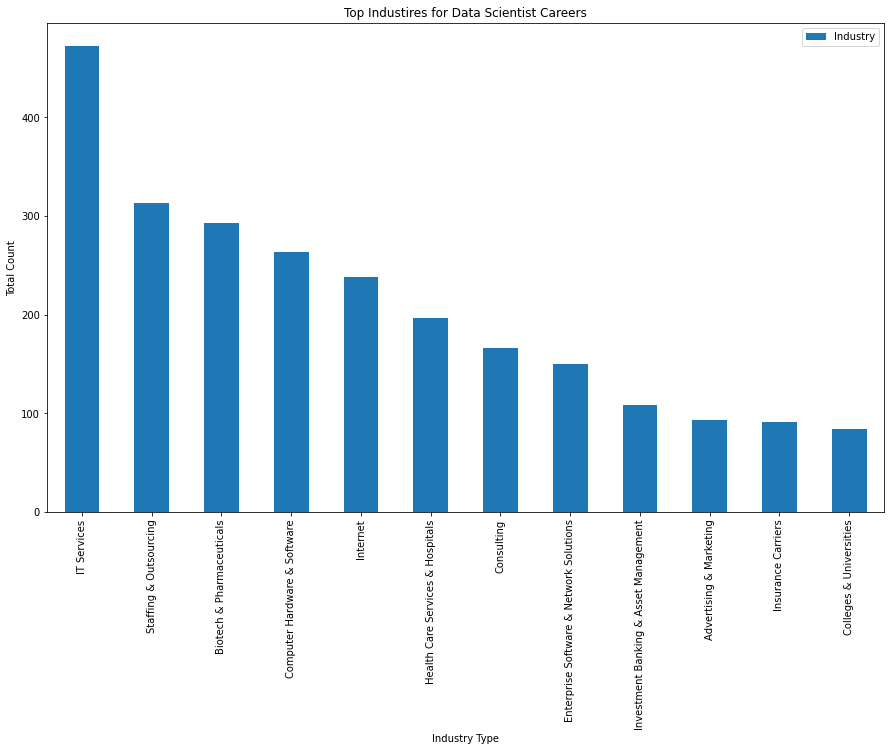

In [13]:
industry.plot.bar(figsize=(15,9), ylabel='Total Count',xlabel='Industry Type', title = 'Top Industires for Data Scientist Careers')


In [4]:
sal = glassdoor_data['Salary Estimate']
#.value_counts().sort_values(ascending = False)
#sal = sal[:55]
#sal.sort_values(['Salary Estimate'], ascending=True, inplace = True) -- error don't use'
start = []
end = []
for x in sal.tolist():
    try:
        val = x.split(' ')
        val = val[0].replace('K-', ",")
        val = val.replace('K', "")
        val = val.split(",")
        end.append(float(val[1][1:]))
        start.append(float(val[0][1:]))
    except:
        end.append(1)
        start.append(1)

glassdoor_data["new estimate"] = [(start[x] + end[x]) / 2 for x in range(len(start))]


NameError: name 'glassdoor_data' is not defined

In [16]:
salary_range = glassdoor_data['new estimate']
salary_range.describe()

count    3909.000000
mean      105.255692
std        39.796232
min         1.000000
25%        73.000000
50%       104.000000
75%       132.500000
max       205.000000
Name: new estimate, dtype: float64

In [17]:
title = glassdoor_data ['Job Title'].value_counts().sort_values(ascending = False)
title = title [:10]
title 

Data Scientist                   274
Data Engineer                    260
Data Analyst                     246
Senior Data Scientist             91
Machine Learning Engineer         47
Senior Data Analyst               47
Big Data Engineer                 41
Business Intelligence Analyst     39
Senior Data Engineer              37
Lead Data Scientist               23
Name: Job Title, dtype: int64

In [18]:
job_title = pd.DataFrame(title)
job_title

,Job Title
Data Scientist,274
Data Engineer,260
Data Analyst,246
Senior Data Scientist,91
Machine Learning Engineer,47
Senior Data Analyst,47
Big Data Engineer,41
Business Intelligence Analyst,39
Senior Data Engineer,37
Lead Data Scientist,23


<AxesSubplot:title={'center':'Top 10 Data Scientist Job Openings According to Glassdoor'}, xlabel='Job Title', ylabel='Total Count'>

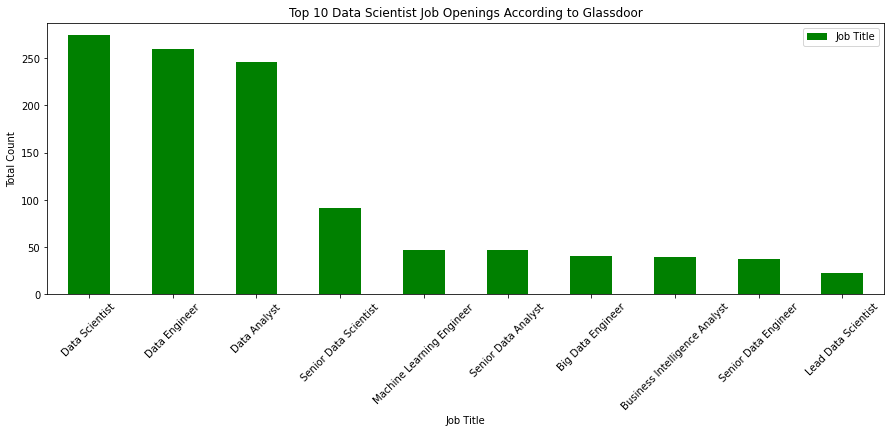

In [19]:
job_title.plot.bar(figsize=(15,5), rot = 45,ylabel='Total Count',xlabel='Job Title', title = 'Top 10 Data Scientist Job Openings According to Glassdoor', color = 'green')


In [20]:
city = glassdoor_data['Location'].value_counts()
city = city [:10]
city 
# Take total states
# Top cities 

Austin, TX          345
Chicago, IL         330
San Diego, CA       304
New York, NY        303
Houston, TX         219
Philadelphia, PA    210
Los Angeles, CA     206
Dallas, TX          180
San Antonio, TX     177
Phoenix, AZ         165
Name: Location, dtype: int64

In [21]:
job_location = pd.DataFrame(city)
job_location

,Location
"Austin, TX",345
"Chicago, IL",330
"San Diego, CA",304
"New York, NY",303
"Houston, TX",219
"Philadelphia, PA",210
"Los Angeles, CA",206
"Dallas, TX",180
"San Antonio, TX",177
"Phoenix, AZ",165


<AxesSubplot:title={'center':'Top 10 Job Locations'}, ylabel='Location'>

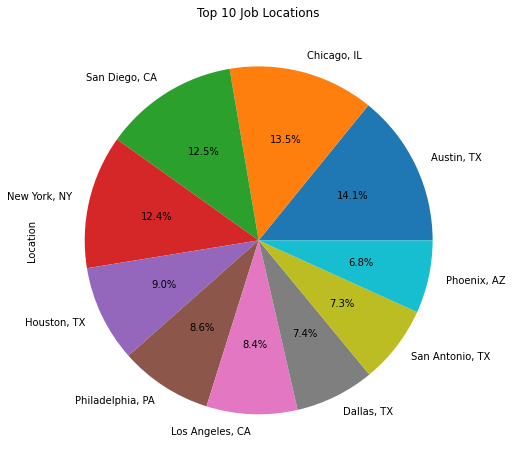

In [22]:
job_location.plot.pie(autopct='%1.1f%%',figsize=(8,8),y='Location',legend=None, title = "Top 10 Job Locations")